In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import Data

In [2]:
df = pd.read_csv('./data/Dry_Bean_Dataset.csv')

## Data Description

In [6]:
# import matplotlib
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("output.html")

C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\abina\AppData\Local\Temp\ipykernel_9780\4227303468.py", line 3, in <cell line: 3>
    profile.to_file("output.html")
  File "C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py", line 370, in to_file
    data = self.to_html()
  File "C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py", line 487, in to_html
    return self.html
  File "C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py", line 283, in html
    self._html = self._render_html()
  File "C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\ydata_profiling\profile_report.py", line 400, in _render_html


In [3]:
df.sample(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2856,72633,1071.572,381.556241,243.631827,1.566118,0.769604,73795,304.103943,0.716641,0.984254,0.794879,0.797009,0.005253,0.001308,0.635224,0.994836,BARBUNYA
7348,66242,1019.994,417.431173,202.914557,2.057177,0.873902,67012,290.416828,0.616296,0.988510,0.800107,0.695724,0.006302,0.000911,0.484032,0.995739,HOROZ
6823,57189,975.783,378.934198,195.201443,1.941247,0.857110,57994,269.843096,0.619250,0.986119,0.754772,0.712111,0.006626,0.001051,0.507102,0.984410,HOROZ
11284,29882,649.082,247.427847,154.779257,1.598585,0.780182,30213,195.056259,0.671430,0.989044,0.891293,0.788336,0.008280,0.001973,0.621474,0.993478,DERMASON
8271,42447,770.203,289.530518,187.134060,1.547182,0.763053,42916,232.476233,0.725404,0.989072,0.899180,0.802942,0.006821,0.001749,0.644716,0.997493,SIRA


In [4]:
df.shape

(13611, 17)

In [8]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [9]:
class_counts = df["Class"].value_counts()
print(class_counts)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Data cleaning

In [6]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

No missing values

In [5]:
df[df.duplicated()]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136540,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


68 Duplicate entry

In [6]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(13543, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# EDA

univariate

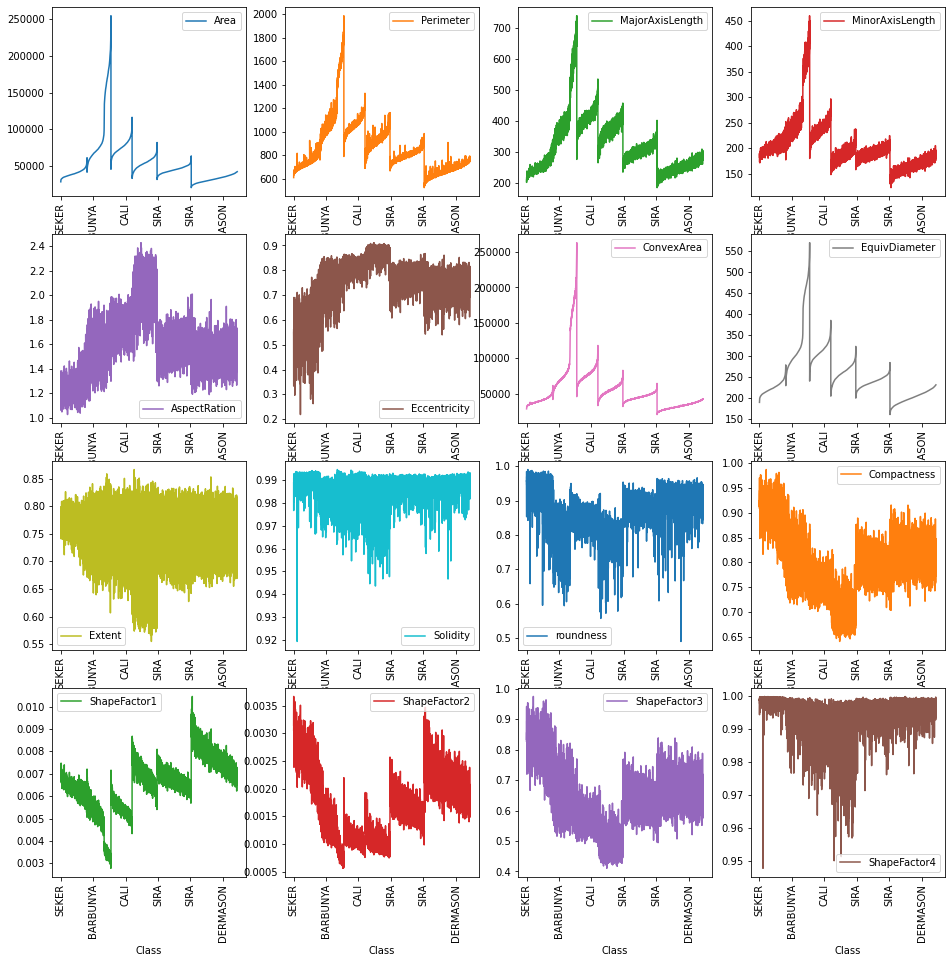

In [10]:
indicators = df.columns[:-1]
df.plot(x = "Class", y = indicators, subplots = True, layout = (4, 4),
       figsize = (16, 16), sharex = False, rot = 90)
plt.show()

note : No plot for type Bombay

In [11]:
unique_classes = df.Class.unique()
def draw_conditional_distribution(ax, df, col):
    bins = np.linspace(df[col].min(), df[col].max(), 50)
    for cls in unique_classes:
        ax.hist(df[df.Class == cls][col], alpha=0.5, label=cls, bins=bins)
    ax.set_title(f'Distributions for {col}')
    ax.legend()

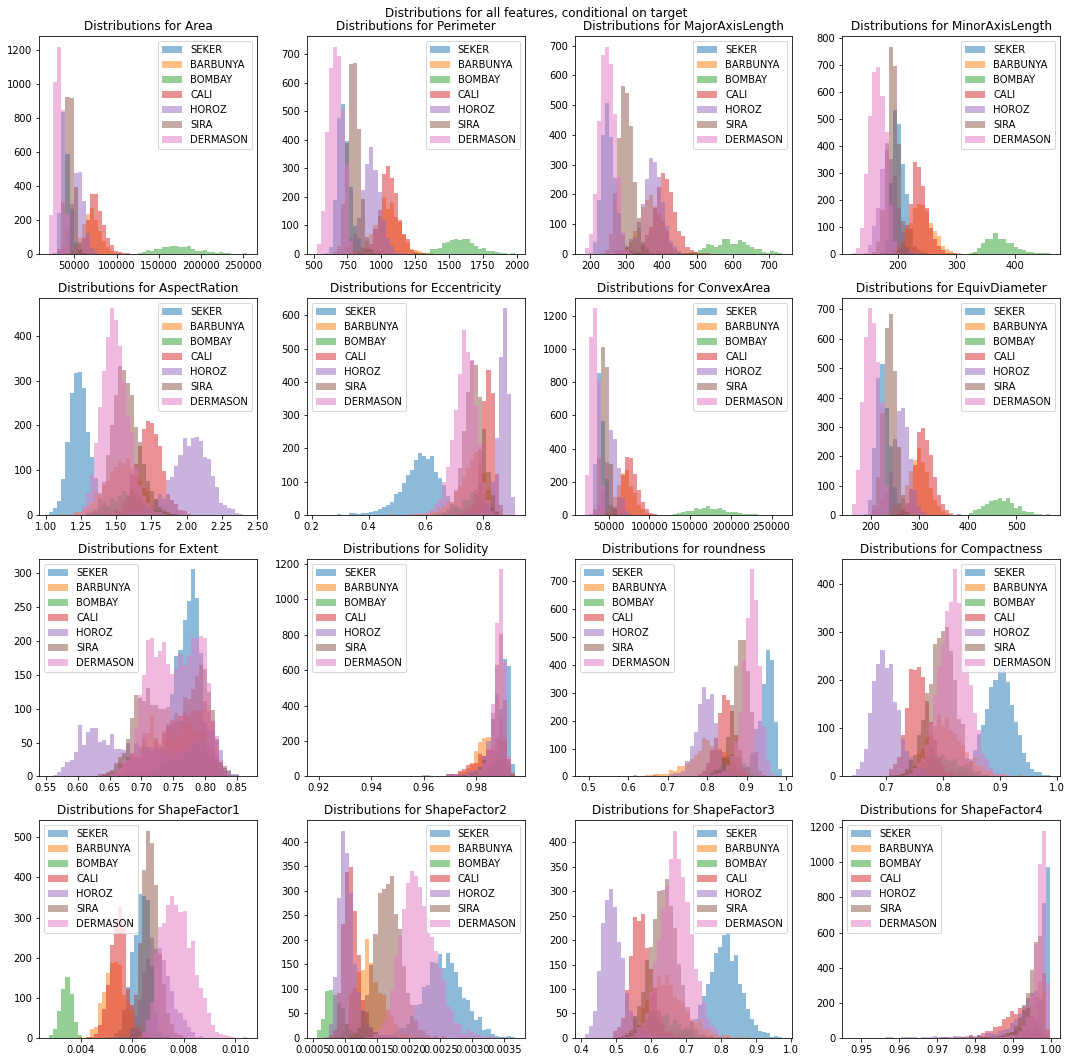

In [12]:
fig, ax = plt.subplots(len(df.drop('Class', axis=1).columns) // 4, 4, figsize=(15, 15))
for idx, col in enumerate(df.drop('Class', axis=1).columns):
    draw_conditional_distribution(ax[idx // 4, idx % 4], df, col)
plt.suptitle('Distributions for all features, conditional on target')
plt.tight_layout()
plt.show()

Here you can immediately notice that the Bombay class is very different from the others. These grains are much larger than the others. There are very many features where we can separate objects of this class from objects of another with a probability very close to 1.


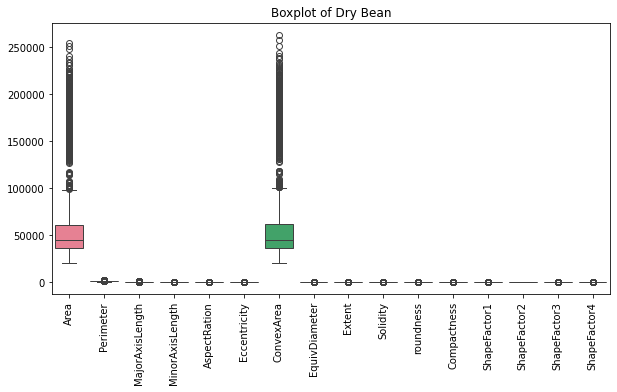

In [13]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

outlier detection

In [14]:
removed = df[(df["Area"] >= 100000) & (df["ConvexArea"] >= 100000)]

In [15]:
class_counts = removed["Class"].value_counts()
print(class_counts)

BOMBAY      522
CALI         22
BARBUNYA      5
Name: Class, dtype: int64


All the instaces from bombay category are outliers also, so we will not consider bobbay class any more.

In [17]:
# Delete outlier of "Area" & "ConvexArea"
df = df[(df["Area"] < 100000) | (df["ConvexArea"] < 100000)]

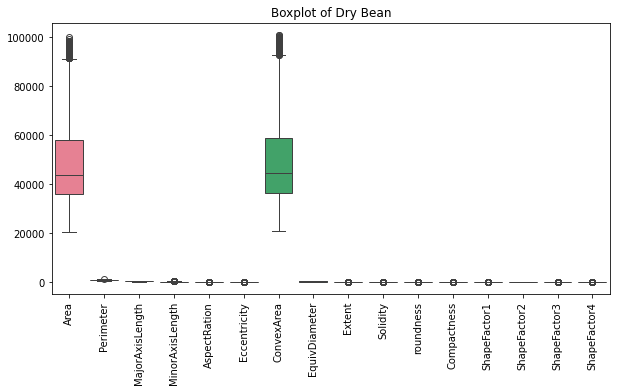

In [23]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [18]:
print(df.shape)
print(df["Class"].unique())

(13062, 17)
['SEKER' 'BARBUNYA' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


Bivarite

In [19]:
def draw_scatterplot(ax, col1, col2, df):
    unique_labels = df.Class.unique()
    for cls in unique_labels:
        filtered = df[df.Class == cls]
        ax.scatter(filtered[col1], filtered[col2], label=cls, alpha=0.2)
    ax.legend()
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f'Joint scatterplot: {col1} & {col2}')

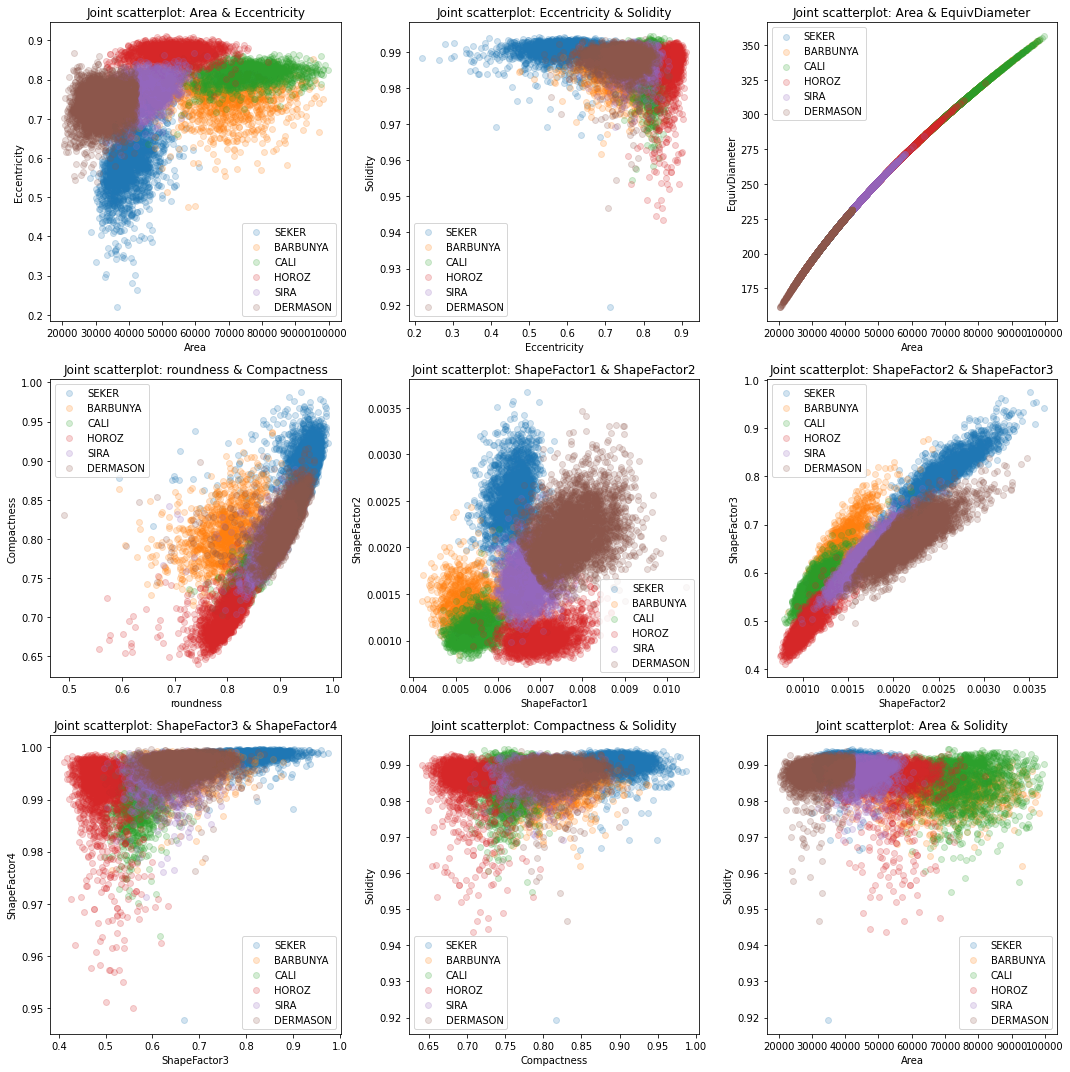

In [20]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
pairs = [('Area', 'Eccentricity'), ('Eccentricity', 'Solidity'), ('Area', 'EquivDiameter'), ('roundness', 'Compactness'),
         ('ShapeFactor1', 'ShapeFactor2'), ('ShapeFactor2', 'ShapeFactor3'), ('ShapeFactor3', 'ShapeFactor4'), ('Compactness', 'Solidity'),
         ('Area', 'Solidity')]
for idx, p in enumerate(pairs):
    draw_scatterplot(ax[idx // 3, idx % 3], *p, df)
plt.tight_layout()
plt.show()

In [15]:
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# plt.figure(figsize = (16, 16))
# for i, col in enumerate(indicators, 1):
#     plt.subplot(4, 4, i)
#     sns.histplot(df[col], kde= True)
#     plt.title(f"Distribution of {col} Data")
#     plt.tight_layout()
#     plt.plot()

C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


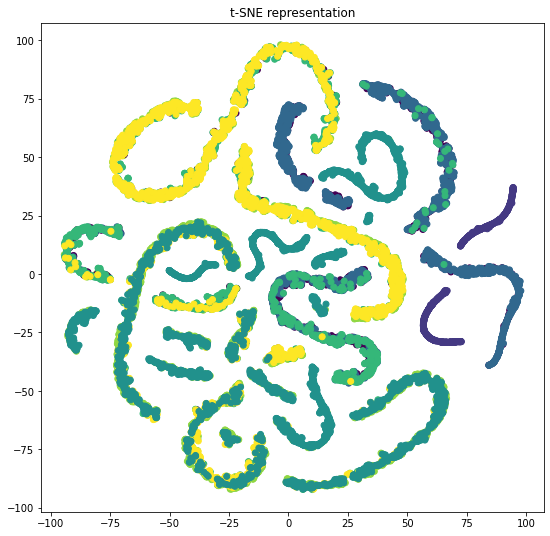

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE()
transformed = tsne.fit_transform(df.drop('Class', axis=1))

from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder().fit_transform(df.Class)

fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(transformed[:, 0], transformed[:, 1], c=labels)
plt.title('t-SNE representation')
plt.show()

C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\abina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


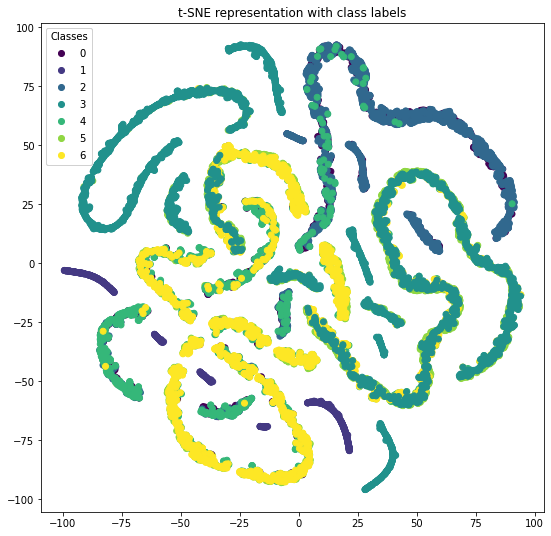

In [12]:
tsne = TSNE()
transformed = tsne.fit_transform(df.drop('Class', axis=1))

labels = LabelEncoder().fit_transform(df['Class'])

# Plot t-SNE representation
fig, ax = plt.subplots(figsize=(9, 9))
scatter = ax.scatter(transformed[:, 0], transformed[:, 1], c=labels)

# Create a legend with class labels
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.title('t-SNE representation with class labels')
plt.show()